# Billionaire dataset descriptive analysis

# Step 5: Temporal analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

pd.set_option("display.max_columns", None)
sns.set_style('darkgrid')

In [3]:
df_bill_num_cat = pd.read_csv("./datasets/billionaires_numeric_modified_3.csv")

df_bill_str = pd.read_csv("./datasets/billionaires_string.csv")

In [4]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


In [25]:
df_bill_num_cat_usa = df_bill_num_cat[df_bill_num_cat['country'] == 'United States'].copy()

In [6]:
df_bill_num_cat_usa.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946
5,6,104000,67,True,1955,10,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248


## Birth decade

In [7]:
df_bill_num_cat['birthYear'].sort_values().reset_index().head(100)

,index,birthYear
0,1879,0
1,1152,0
2,423,0
3,2203,0
4,1292,0
...,...,...
95,982,1928
96,1928,1928
97,473,1928
98,1629,1928


In [8]:
pd.cut(df_bill_num_cat['birthYear'], bins=range(1920, 2005, 10), include_lowest=True, right=False)

0       [1940, 1950)
1       [1970, 1980)
2       [1960, 1970)
3       [1940, 1950)
4       [1930, 1940)
            ...     
2635    [1970, 1980)
2636    [1940, 1950)
2637    [1960, 1970)
2638    [1950, 1960)
2639    [1950, 1960)
Name: birthYear, Length: 2640, dtype: category
Categories (8, interval[int64, left]): [[1920, 1930) < [1930, 1940) < [1940, 1950) < [1950, 1960) < [1960, 1970) < [1970, 1980) < [1980, 1990) < [1990, 2000)]

In [9]:
df_bill_num_cat['birthDecade'] = pd.cut(df_bill_num_cat['birthYear'], bins=range(1920, 2005, 10), include_lowest=True, right=False)

In [10]:
df_bill_num_cat['birthDecade'] = df_bill_num_cat['birthDecade'].astype('str')

In [11]:
df_bill_num_cat['birthDecade'].str.replace('[', '').str.replace(',', ' -').str.replace(')', '')

0       1940 - 1950
1       1970 - 1980
2       1960 - 1970
3       1940 - 1950
4       1930 - 1940
           ...     
2635    1970 - 1980
2636    1940 - 1950
2637    1960 - 1970
2638    1950 - 1960
2639    1950 - 1960
Name: birthDecade, Length: 2640, dtype: object

In [12]:
df_bill_num_cat['birthDecade'] = df_bill_num_cat['birthDecade'].str.replace('[', '').str.replace(',', ' -').str.replace(')', '')

In [13]:
df_bill_num_cat['birthDecade'].replace('2000+', np.nan, inplace=True)

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_27147/3190723068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bill_num_cat['birthDecade'].replace('2000+', np.nan, inplace=True)


In [14]:
df_bill_num_cat.groupby('birthDecade')['birthDecade'].size().reset_index(name='count').drop(index=8)

,birthDecade,count
0,1920 - 1930,38
1,1930 - 1940,197
2,1940 - 1950,525
3,1950 - 1960,662
4,1960 - 1970,710
5,1970 - 1980,306
6,1980 - 1990,107
7,1990 - 2000,14


In [15]:
decade_grouped = df_bill_num_cat.groupby('birthDecade')['birthDecade'].size().reset_index(name='count').drop(index=8)

In [16]:
decade_grouped

,birthDecade,count
0,1920 - 1930,38
1,1930 - 1940,197
2,1940 - 1950,525
3,1950 - 1960,662
4,1960 - 1970,710
5,1970 - 1980,306
6,1980 - 1990,107
7,1990 - 2000,14


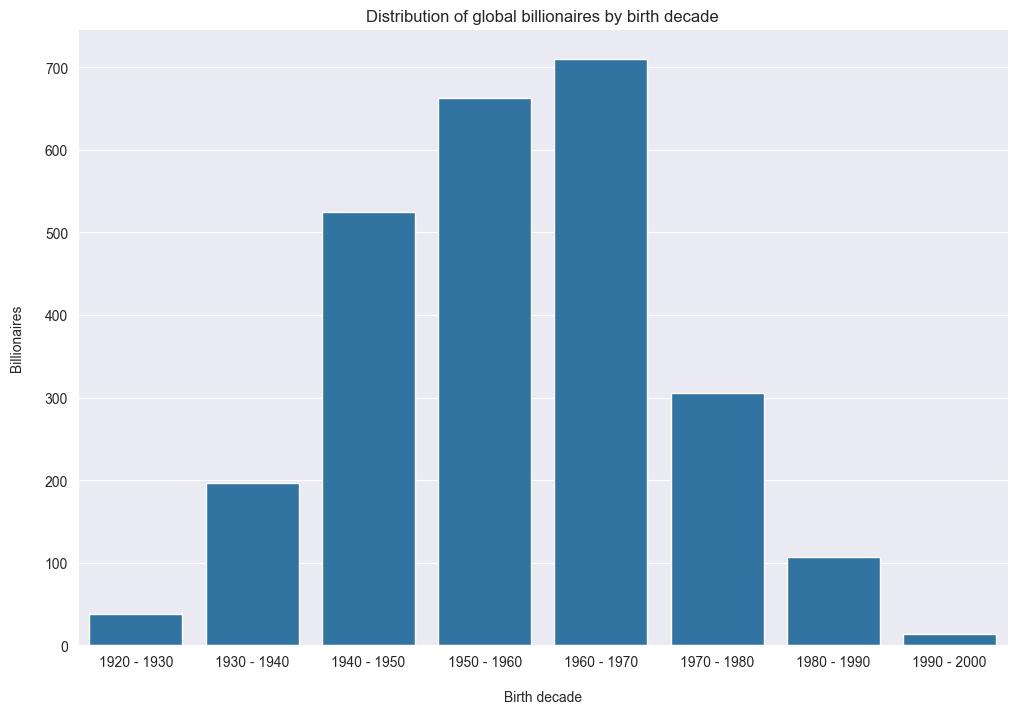

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=decade_grouped, x=decade_grouped['birthDecade'],  
            y=decade_grouped['count'])
plt.title("Distribution of global billionaires by birth decade")
# plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth decade', labelpad=15)
plt.show()

In [90]:
decade_grouped_total_avr_wealth = df_bill_num_cat.groupby('birthDecade')['finalWorth'].agg(['sum', 'mean']).reset_index().drop(index=8)

In [19]:
decade_grouped_total_avr_wealth

,birthDecade,sum,mean
0,1920 - 1930,238900,6286.842105
1,1930 - 1940,1322000,6710.659898
2,1940 - 1950,2789800,5313.904762
3,1950 - 1960,2995600,4525.075529
4,1960 - 1970,2820400,3972.394366
5,1970 - 1980,1316600,4302.614379
6,1980 - 1990,463500,4331.775701
7,1990 - 2000,63200,4514.285714


In [20]:
decade_grouped = decade_grouped.merge(decade_grouped_total_avr_wealth, how='left', on='birthDecade')

In [21]:
decade_grouped

,birthDecade,count,sum,mean
0,1920 - 1930,38,238900,6286.842105
1,1930 - 1940,197,1322000,6710.659898
2,1940 - 1950,525,2789800,5313.904762
3,1950 - 1960,662,2995600,4525.075529
4,1960 - 1970,710,2820400,3972.394366
5,1970 - 1980,306,1316600,4302.614379
6,1980 - 1990,107,463500,4331.775701
7,1990 - 2000,14,63200,4514.285714


/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_27147/780104461.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(decade_grouped['birthDecade'], rotation='vertical')


<Figure size 1400x800 with 0 Axes>

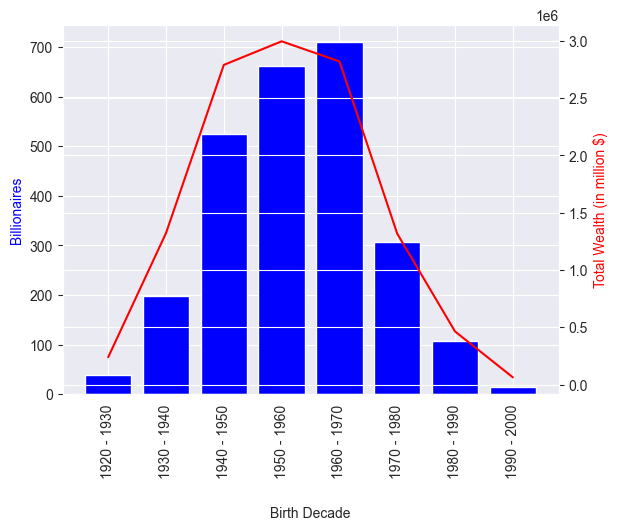

In [93]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(decade_grouped['birthDecade'], decade_grouped['count'], color='b', )
ax2.plot(decade_grouped.index, decade_grouped['sum'], 'r')

ax1.set_xlabel('Birth Decade', labelpad=20)
ax1.set_ylabel('Billionaires', color='b')
ax2.set_ylabel('Total Wealth (in million $)', color='r')
ax1.set_xticklabels(decade_grouped['birthDecade'], rotation='vertical')

plt.show()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_27147/549210916.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(decade_grouped['birthDecade'], rotation='vertical')


<Figure size 1400x800 with 0 Axes>

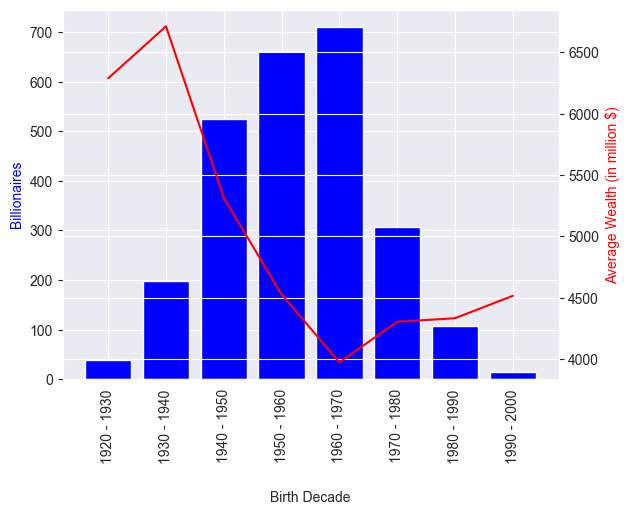

In [92]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(decade_grouped['birthDecade'], decade_grouped['count'], color='b', )
ax2.plot(decade_grouped.index, decade_grouped['mean'], 'r')

ax1.set_xlabel('Birth Decade', labelpad=20)
ax1.set_ylabel('Billionaires', color='b')
ax2.set_ylabel('Average Wealth (in million $)', color='r')
ax1.set_xticklabels(decade_grouped['birthDecade'], rotation='vertical')

plt.show()

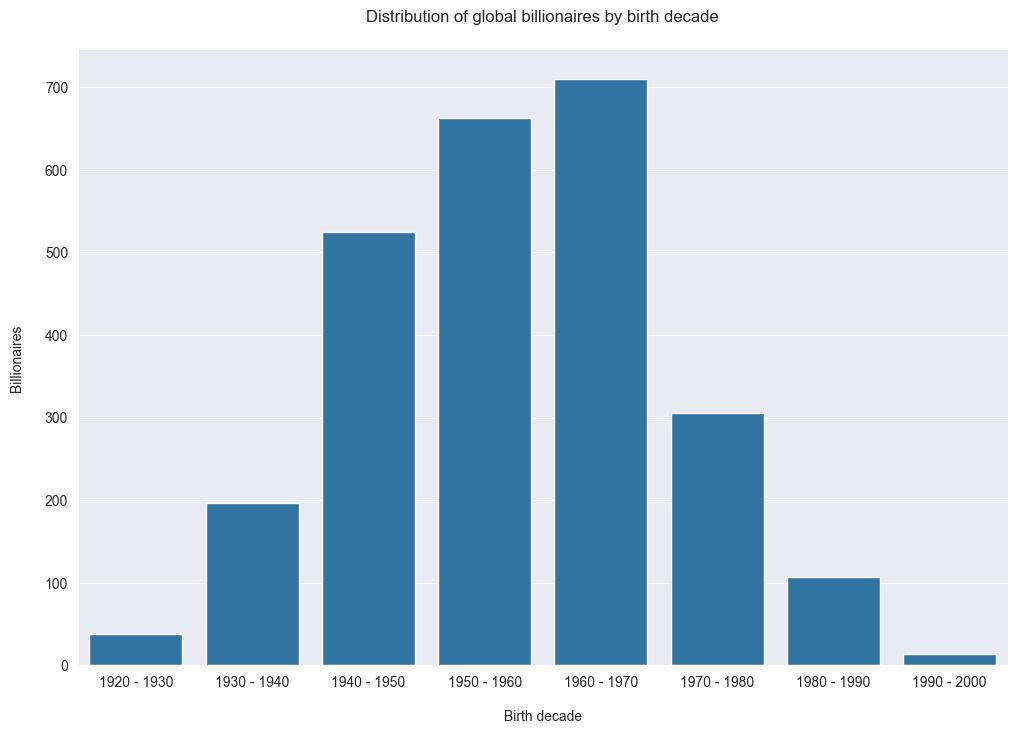

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=decade_grouped_total_avr_wealth, x=decade_grouped_total_avr_wealth['birthDecade'],  
            y=decade_grouped['count'])
plt.title("Distribution of global billionaires by birth decade", pad=20)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth decade', labelpad=15)
plt.show()

### United States

In [26]:
decade_grouped_usa = df_bill_num_cat_usa.groupby('birthDecade')['birthDecade'].size().reset_index(name='count')

In [86]:
decade_grouped_usa

,birthDecade,count
0,1920 - 1930,15
1,1930 - 1940,84
2,1940 - 1950,186
3,1950 - 1960,197
4,1960 - 1970,154
5,1970 - 1980,73
6,1980 - 1990,41
7,1990 - 2000,4


In [27]:
decade_grouped_usa = df_bill_num_cat_usa.groupby('birthDecade')['birthDecade'].size().reset_index(name='count')

decade_grouped_total_avr_wealth_usa = df_bill_num_cat_usa.groupby('birthDecade')['finalWorth'].agg(['sum', 'mean']).reset_index()

decade_grouped_usa = decade_grouped_usa.merge(decade_grouped_total_avr_wealth_usa, how='left', on='birthDecade')

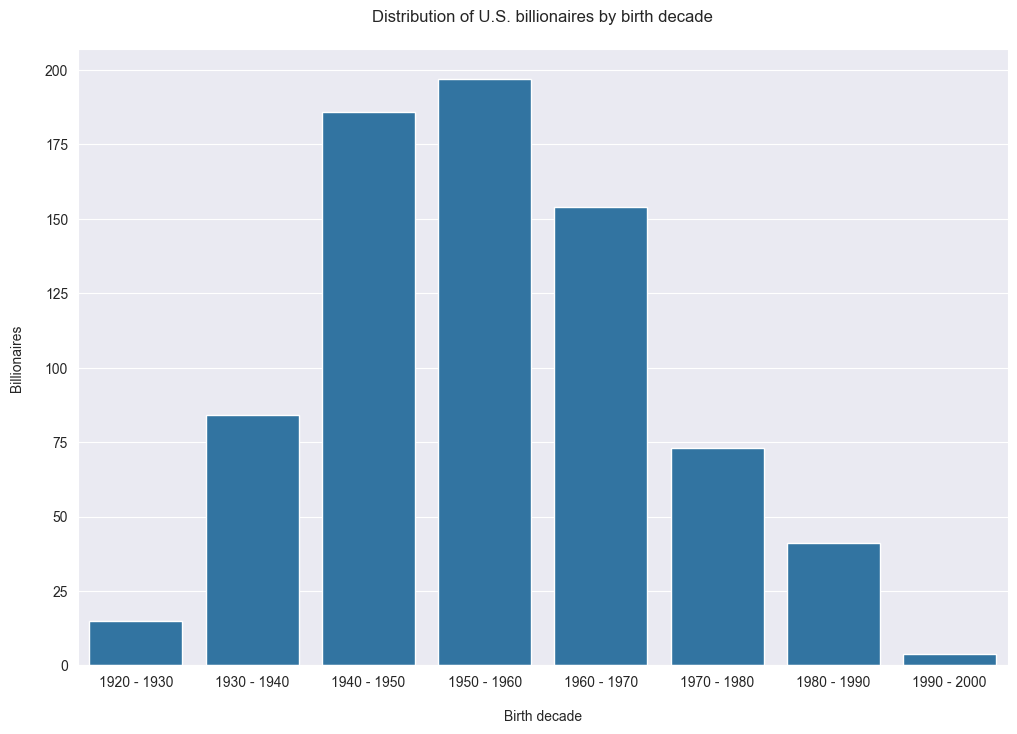

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(data=decade_grouped_usa, x=decade_grouped_usa['birthDecade'],  
            y=decade_grouped_usa['count'])
plt.title("Distribution of U.S. billionaires by birth decade", pad=20)
# plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth decade', labelpad=15)
plt.show()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_27147/1282450931.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(decade_grouped_usa['birthDecade'], rotation='vertical')


<Figure size 1400x800 with 0 Axes>

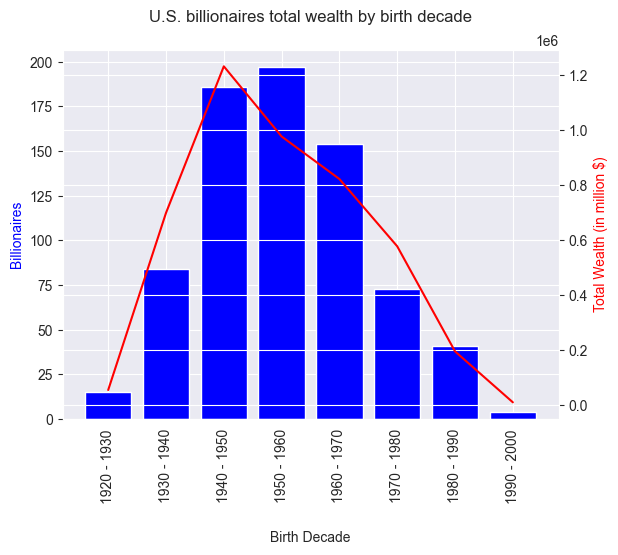

In [29]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

plt.title("U.S. billionaires total wealth by birth decade", pad=20)

ax1.bar(decade_grouped_usa['birthDecade'], decade_grouped_usa['count'], color='b', )
ax2.plot(decade_grouped_usa.index, decade_grouped_usa['sum'], 'r')

ax1.set_xlabel('Birth Decade', labelpad=20)
ax1.set_ylabel('Billionaires', color='b')
ax2.set_ylabel('Total Wealth (in million $)', color='r')
ax1.set_xticklabels(decade_grouped_usa['birthDecade'], rotation='vertical')

plt.show()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_13578/3052005342.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(decade_grouped_usa['birthDecade'], rotation='vertical')


<Figure size 1400x800 with 0 Axes>

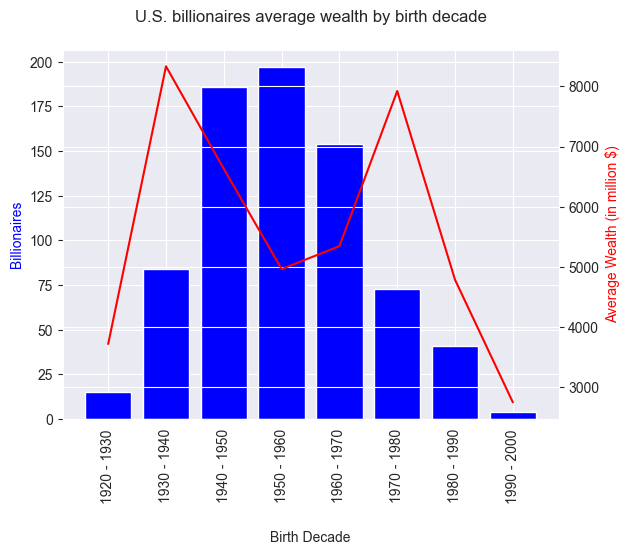

In [95]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

plt.title("U.S. billionaires average wealth by birth decade", pad=20)

ax1.bar(decade_grouped_usa['birthDecade'], decade_grouped_usa['count'], color='b', )
ax2.plot(decade_grouped_usa.index, decade_grouped_usa['mean'], 'r')

ax1.set_xlabel('Birth Decade', labelpad=20)
ax1.set_ylabel('Billionaires', color='b')
ax2.set_ylabel('Average Wealth (in million $)', color='r')
ax1.set_xticklabels(decade_grouped_usa['birthDecade'], rotation='vertical')

plt.show()

## Birth month

In [30]:
month_names = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug', 
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [31]:
df_bill_num_cat['birthMonthNames'] = df_bill_num_cat['birthMonth'].map(month_names)

In [32]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat,birthDecade,birthMonthNames
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165,1940 - 1950,Mar
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411,1970 - 1980,Jun
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248,1960 - 1970,Jan
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248,1940 - 1950,Aug
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946,1930 - 1940,Aug


In [33]:
df_bill_num_cat['birthMonth'].value_counts().reset_index()

,birthMonth,count
0,1,550
1,10,209
2,9,200
3,3,199
4,8,199
5,7,195
6,12,179
7,5,179
8,4,176
9,2,164


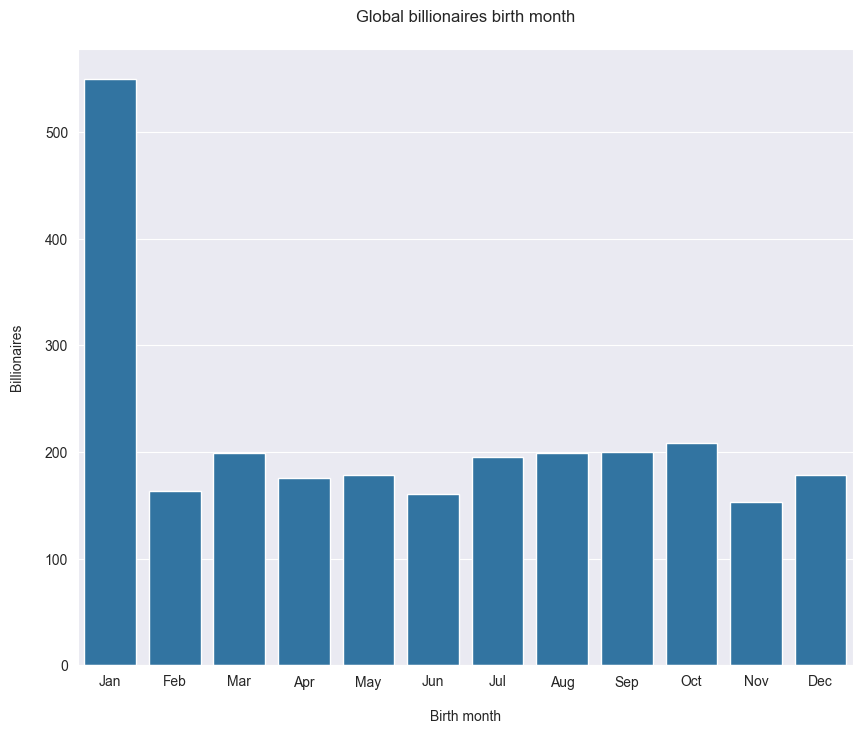

In [88]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_bill_num_cat, x=df_bill_num_cat['birthMonth'].value_counts().reset_index().drop(index=12)['birthMonth'], 
            y=df_bill_num_cat['birthMonth'].value_counts().reset_index()['count'])
plt.title("Global billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.show()

In [35]:
df_bill_num_cat_usa.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat,birthDecade
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411,1970 - 1980
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248,1960 - 1970
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248,1940 - 1950
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946,1930 - 1940
5,6,104000,67,True,1955,10,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.09024,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248,1950 - 1960


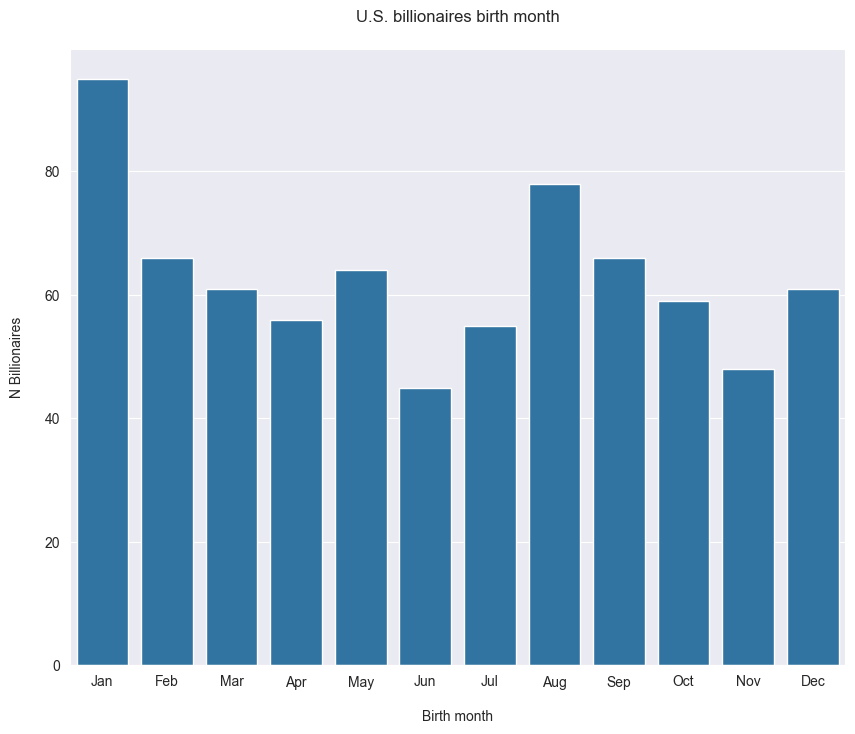

In [87]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_bill_num_cat_usa, x=df_bill_num_cat_usa['birthMonth'].value_counts().reset_index()['birthMonth'], 
            y=df_bill_num_cat_usa['birthMonth'].value_counts().reset_index()['count'], order=None)
plt.title("U.S. billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('N Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.show()

In [55]:
birth_month_gender = df_bill_num_cat.groupby(['birthMonth', 'gender']).size().reset_index(name='count')

birth_month_selfMade = df_bill_num_cat.groupby(['birthMonth', 'selfMade']).size().reset_index(name='count')

birth_month_gender_usa = df_bill_num_cat_usa.groupby(['birthMonth', 'gender']).size().reset_index(name='count')

birth_month_selfMade_usa = df_bill_num_cat_usa.groupby(['birthMonth', 'selfMade']).size().reset_index(name='count')

In [56]:
birth_month_gender

,birthMonth,gender,count
0,0,F,33
1,0,M,43
2,1,F,81
3,1,M,469
4,2,F,18
5,2,M,146
6,3,F,22
7,3,M,177
8,4,F,20
9,4,M,156


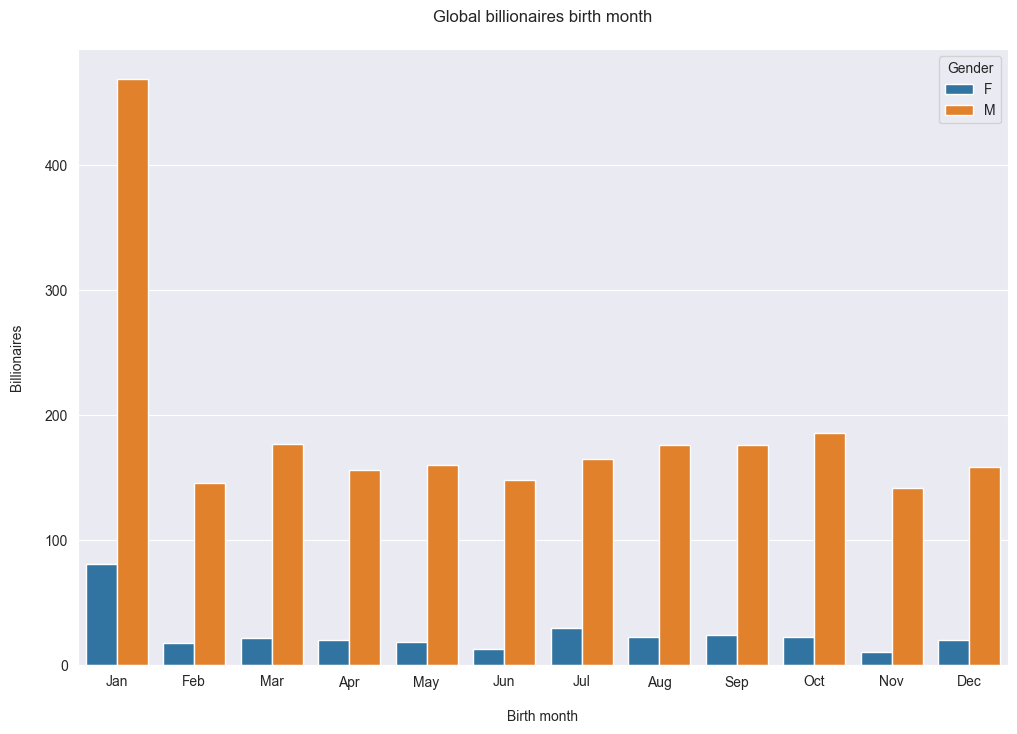

In [86]:
plt.figure(figsize=(12, 8))
sns.barplot(data=birth_month_gender.drop(index=[0, 1]), x='birthMonth', 
            y='count', hue='gender')
plt.title("Global billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.legend(title='Gender')
plt.show()

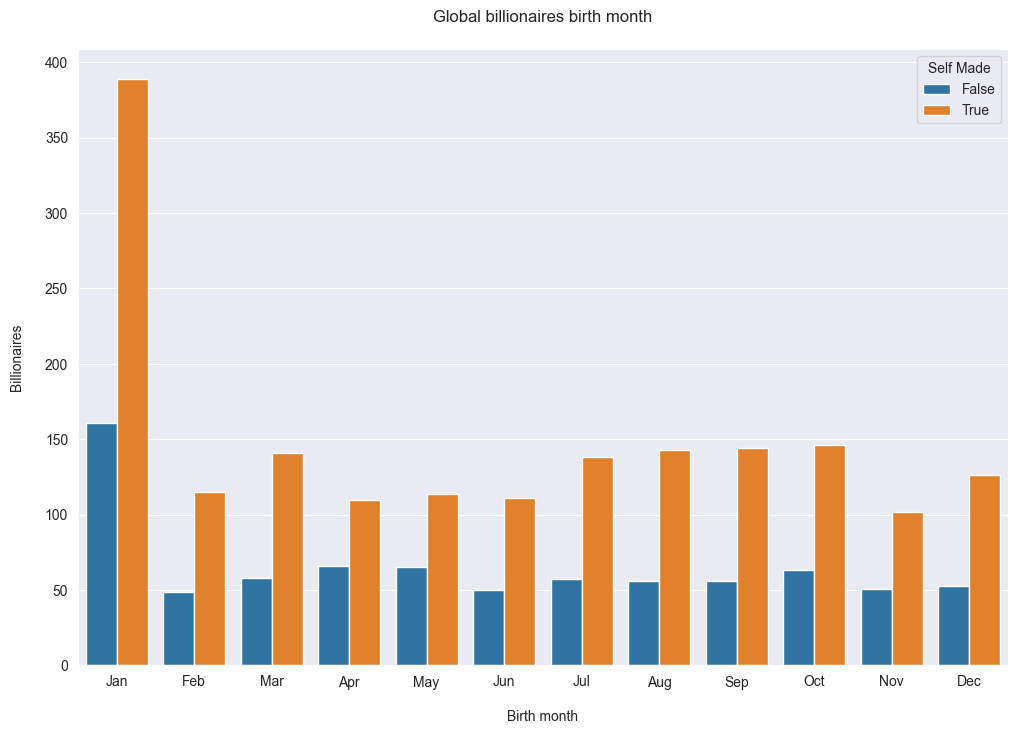

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(data=birth_month_selfMade.drop(index=[0, 1]), x='birthMonth', 
            y='count', hue='selfMade')
plt.title("Global billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.legend(title='Self Made')
plt.show()

In [41]:
birth_month_gender_usa

,birthMonth,gender,count
0,1,F,19
1,1,M,76
2,2,F,7
3,2,M,59
4,3,F,6
5,3,M,55
6,4,F,8
7,4,M,48
8,5,F,7
9,5,M,57


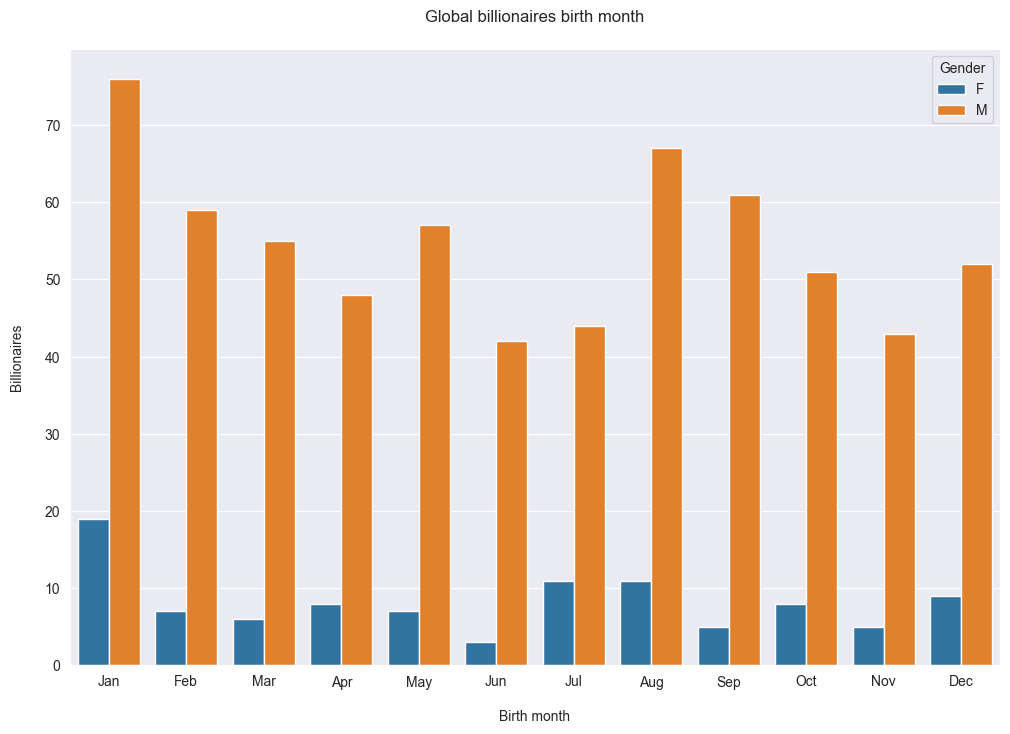

In [83]:
plt.figure(figsize=(12, 8))
# Create the stacked bar chart

# df_pivoted_gender_category.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='tab10')

# birth_month_gender_usa.plot(kind='bar', stacked=True, x='birthMonth', y='count', cmap='tab10')
sns.barplot(data=birth_month_gender_usa, x='birthMonth', y='count', hue='gender')
plt.title("Global billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.legend(title="Gender")
plt.show()

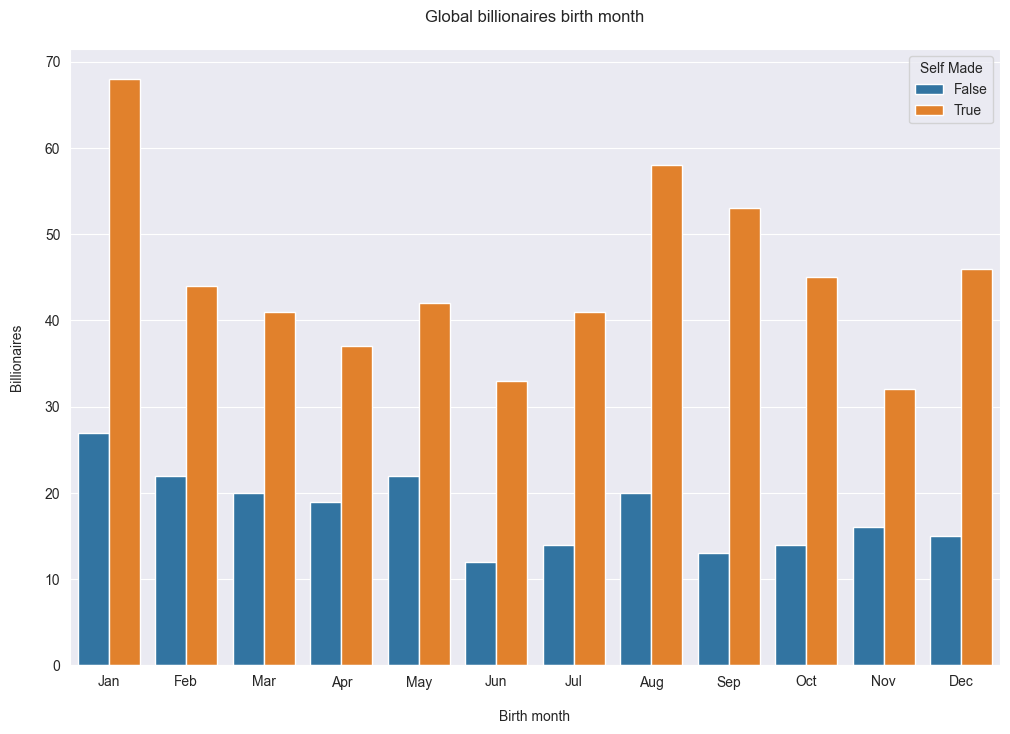

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(data=birth_month_selfMade_usa, x='birthMonth', 
            y='count', hue='selfMade')
plt.title("Global billionaires birth month", pad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth month', labelpad=15)
plt.legend(title="Self Made")
plt.show()

In [104]:
df_bill_num_cat.groupby(['birthDecade', 'gender']).size().reset_index(name='count')

,birthDecade,gender,count
0,1920 - 1930,F,5
1,1920 - 1930,M,33
2,1930 - 1940,F,21
3,1930 - 1940,M,176
4,1940 - 1950,F,56
5,1940 - 1950,M,469
6,1950 - 1960,F,72
7,1950 - 1960,M,590
8,1960 - 1970,F,85
9,1960 - 1970,M,625


In [121]:
df_bdecade_gender = df_bill_num_cat.groupby(['birthDecade', 'gender']).size().reset_index(name='count').drop(index=[16, 17])
df_pivoted_bdecade_gender = df_bdecade_gender.pivot(index='birthDecade', columns='gender', values='count')
# df_pivoted_bdecade_gender = df_pivoted_bdecade_gender.sort_values(by=['M', 'F'], ascending=False)

df_bdecade_selfMade = df_bill_num_cat.groupby(['birthDecade', 'selfMade']).size().reset_index(name='count').drop(index=[16, 17])
df_pivoted_bdecade_seflMade = df_bdecade_selfMade.pivot(index='birthDecade', columns='selfMade', values='count')
df_pivoted_bdecade_selfMade = df_pivoted_bdecade_seflMade.sort_values(by='birthDecade', ascending=True)

In [122]:
df_pivoted_bdecade_seflMade

selfMade,False,True
birthDecade,,
1920 - 1930,9,29
1930 - 1940,68,129
1940 - 1950,185,340
1950 - 1960,238,424
1960 - 1970,156,554
1970 - 1980,79,227
1980 - 1990,36,71
1990 - 2000,9,5


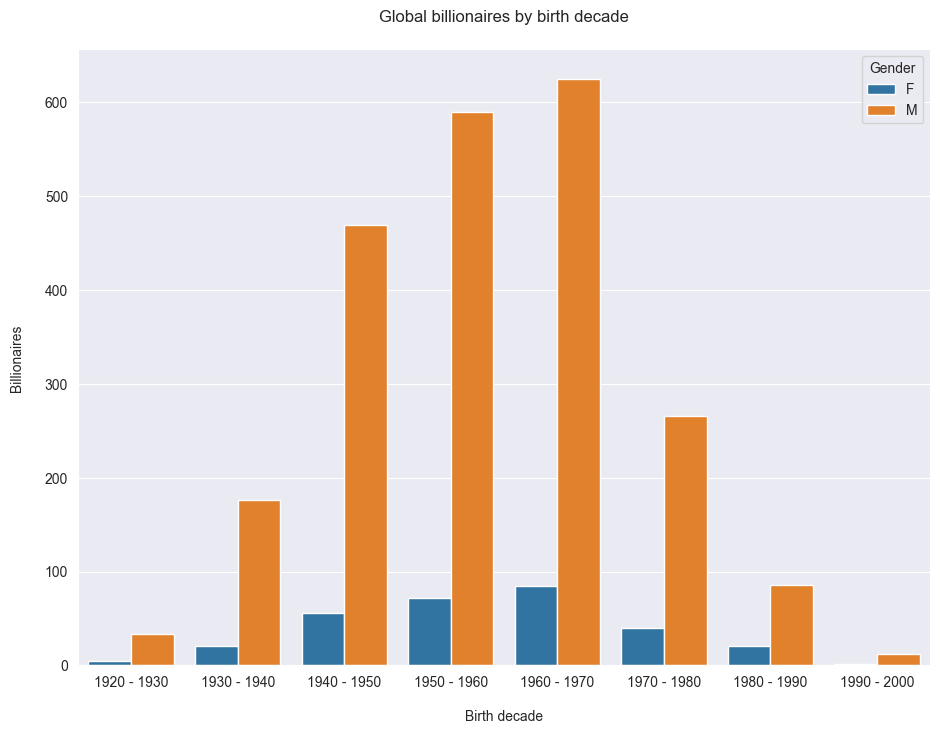

In [80]:
plt.figure(figsize=(11, 8))
sns.barplot(data=df_bdecade_gender, x='birthDecade', 
            y='count', hue='gender')
plt.title("Global billionaires by birth decade", pad=20)
#plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth decade', labelpad=15)
plt.legend(title="Gender")
plt.show()

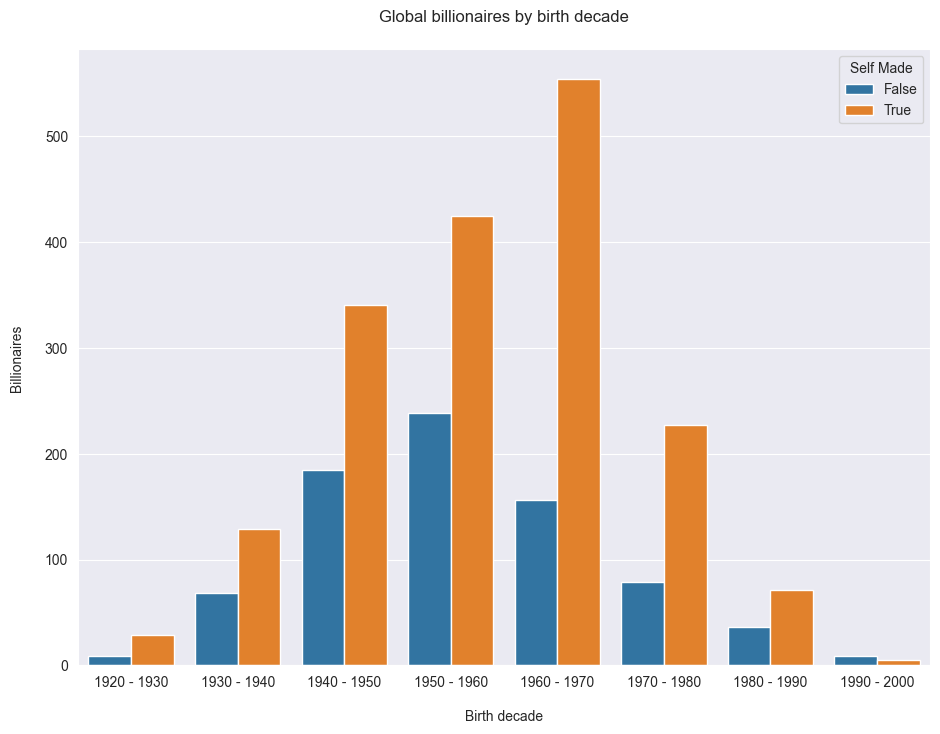

In [81]:
plt.figure(figsize=(11, 8))
sns.barplot(data=df_bdecade_selfMade, x='birthDecade', 
            y='count', hue='selfMade')
plt.title("Global billionaires by birth decade", pad=20)
#plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.ylabel('Billionaires', labelpad=15)
plt.xlabel('Birth decade', labelpad=15)
plt.legend(title="Self Made")
plt.show()

In [124]:
df_pivoted_bdecade_gender

gender,F,M
birthDecade,,
1920 - 1930,5,33
1930 - 1940,21,176
1940 - 1950,56,469
1950 - 1960,72,590
1960 - 1970,85,625
1970 - 1980,40,266
1980 - 1990,21,86
1990 - 2000,2,12


<Figure size 1200x800 with 0 Axes>

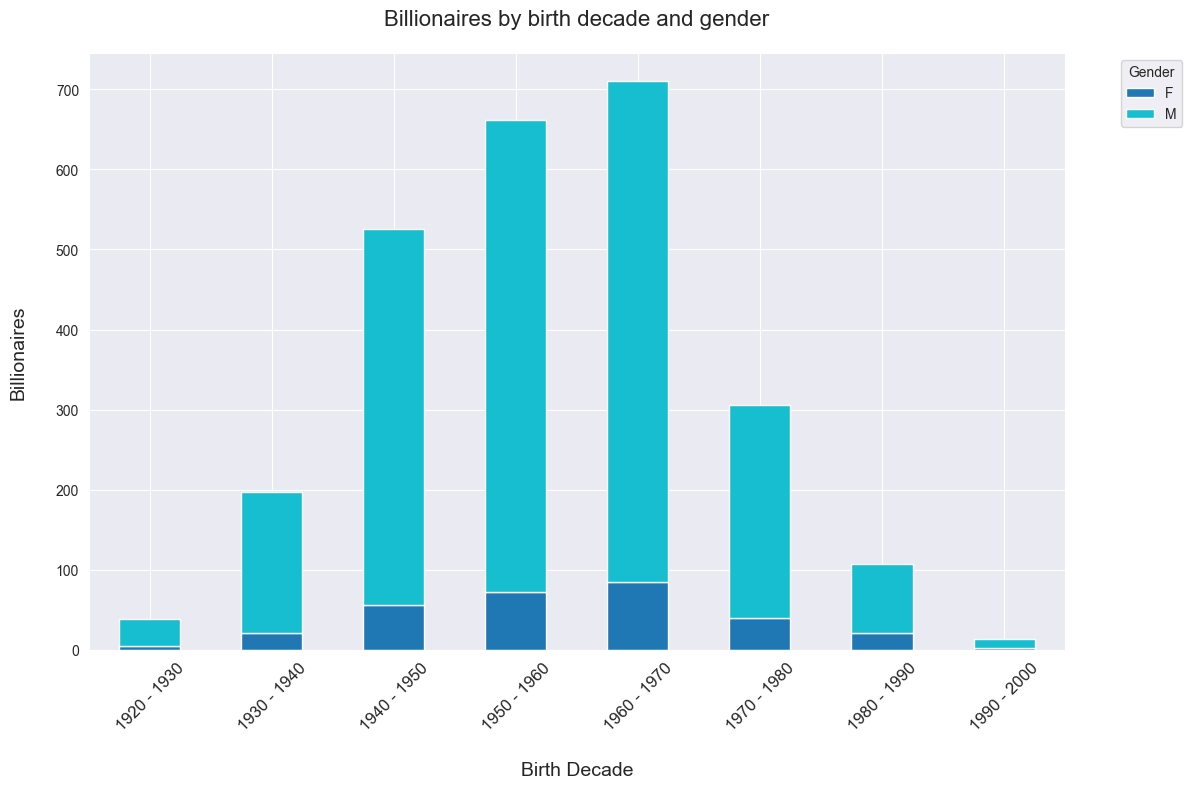

In [127]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bdecade_gender.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Billionaires by birth decade and gender', fontsize=16, pad=20)
plt.xlabel('Birth Decade', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [120]:
df_pivoted_bdecade_seflMade

selfMade,False,True
birthDecade,,
1920 - 1930,9,29
1930 - 1940,68,129
1940 - 1950,185,340
1950 - 1960,238,424
1960 - 1970,156,554
1970 - 1980,79,227
1980 - 1990,36,71
1990 - 2000,9,5


<Figure size 1200x800 with 0 Axes>

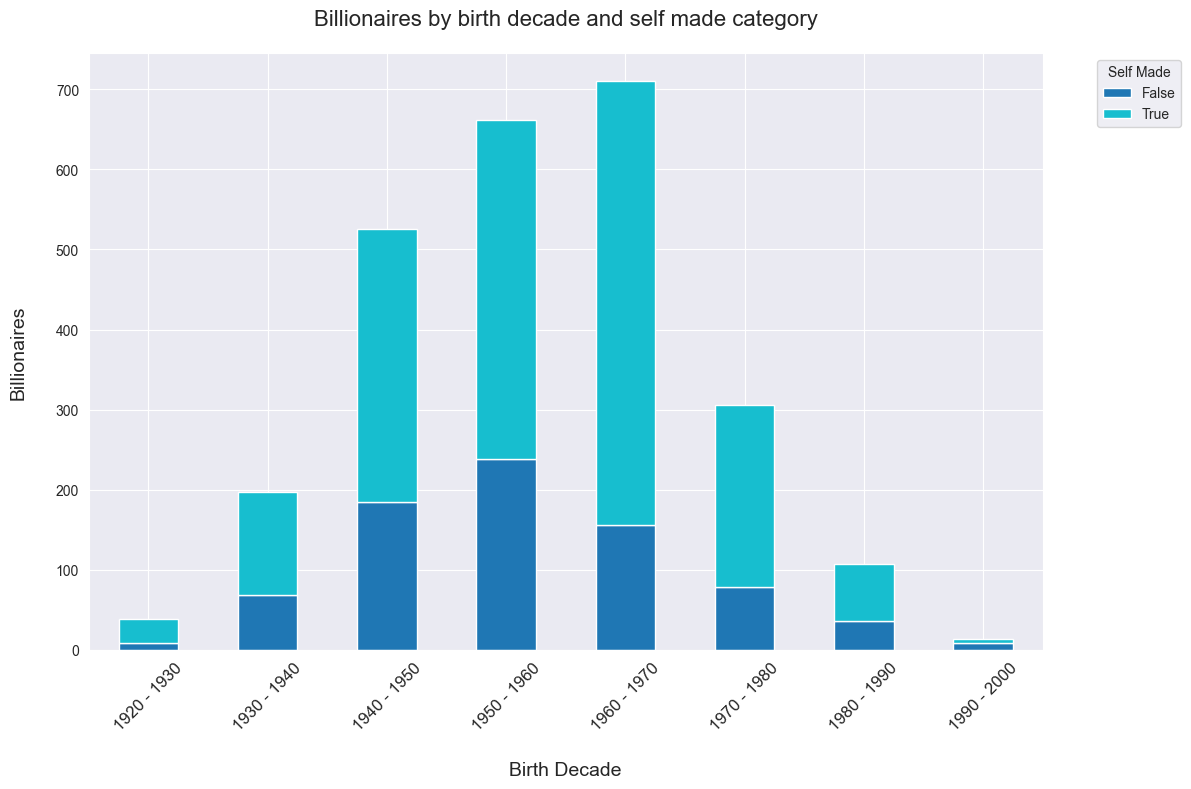

In [128]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bdecade_selfMade.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Billionaires by birth decade and self made category', fontsize=16, pad=20)
plt.xlabel('Birth Decade', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [102]:
df_bill_num_cat_usa.groupby(['birthDecade', 'gender']).size().reset_index(name='count')

,birthDecade,gender,count
0,1920 - 1930,F,2
1,1920 - 1930,M,13
2,1930 - 1940,F,14
3,1930 - 1940,M,70
4,1940 - 1950,F,21
5,1940 - 1950,M,165
6,1950 - 1960,F,29
7,1950 - 1960,M,168
8,1960 - 1970,F,23
9,1960 - 1970,M,131


In [134]:
df_bdecade_gender_usa = df_bill_num_cat_usa.groupby(['birthDecade', 'gender']).size().reset_index(name='count')
df_pivoted_bdecade_gender_usa = df_bdecade_gender_usa.pivot(index='birthDecade', columns='gender', values='count')
# df_pivoted_bdecade_gender = df_pivoted_bdecade_gender.sort_values(by=['M', 'F'], ascending=False)

df_bdecade_selfMade_usa = df_bill_num_cat_usa.groupby(['birthDecade', 'selfMade']).size().reset_index(name='count')
df_pivoted_bdecade_selfMade_usa = df_bdecade_selfMade_usa.pivot(index='birthDecade', columns='selfMade', values='count')
df_pivoted_bdecade_selfMade_usa = df_pivoted_bdecade_selfMade_usa.sort_values(by='birthDecade', ascending=True)

In [135]:
df_pivoted_bdecade_gender_usa

gender,F,M
birthDecade,,
1920 - 1930,2.0,13.0
1930 - 1940,14.0,70.0
1940 - 1950,21.0,165.0
1950 - 1960,29.0,168.0
1960 - 1970,23.0,131.0
1970 - 1980,5.0,68.0
1980 - 1990,5.0,36.0
1990 - 2000,NaN,4.0


<Figure size 1200x800 with 0 Axes>

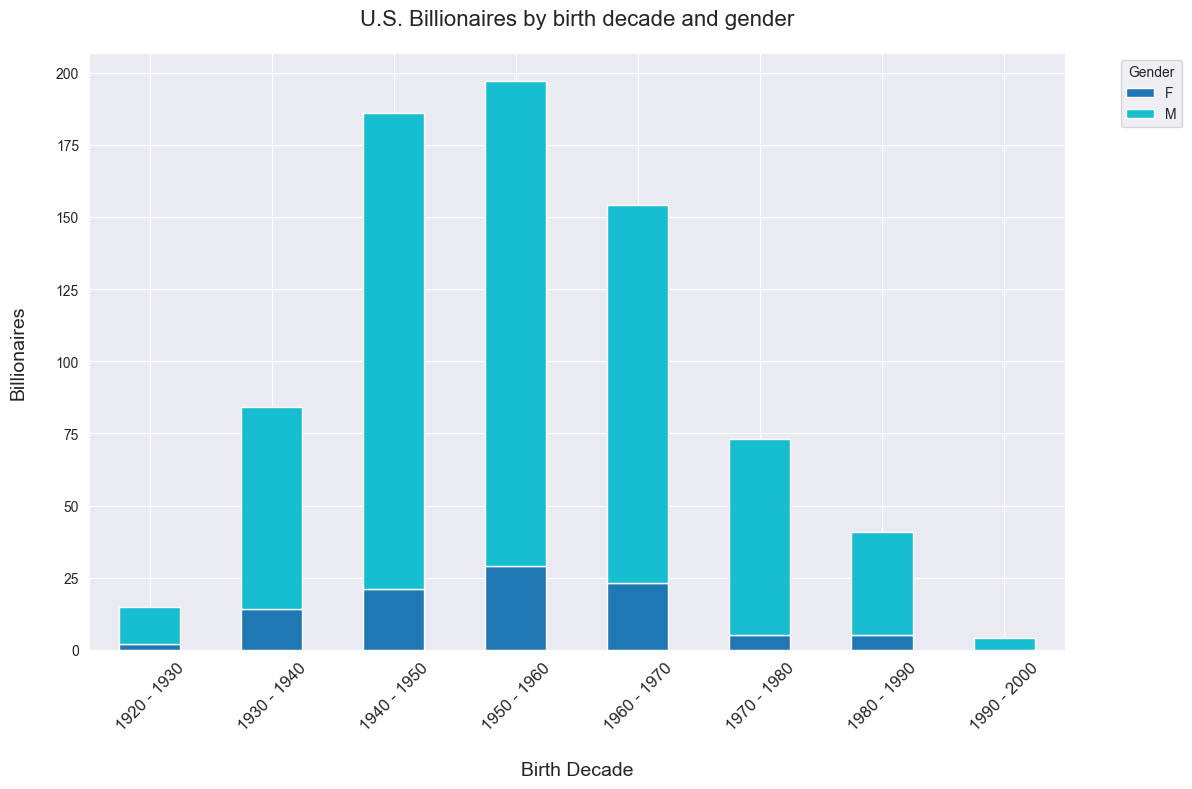

In [137]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bdecade_gender_usa.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('U.S. Billionaires by birth decade and gender', fontsize=16, pad=20)
plt.xlabel('Birth Decade', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

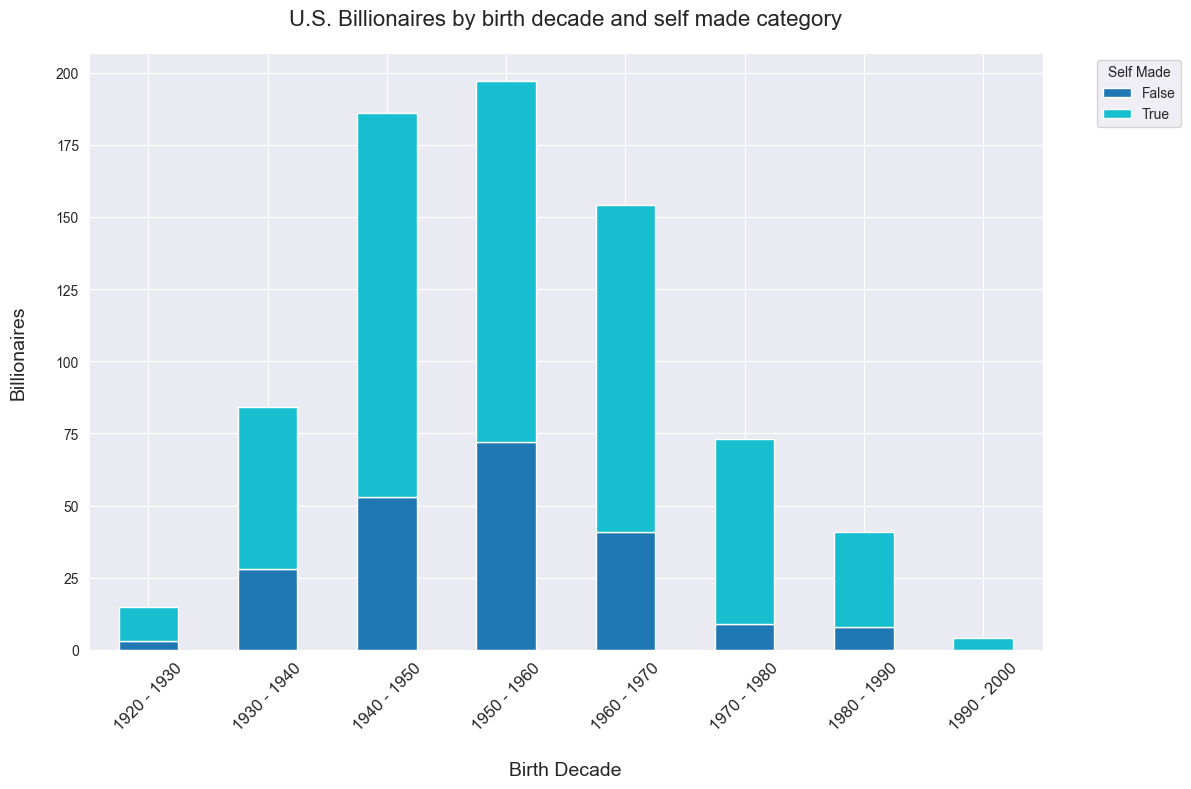

In [139]:
plt.figure(figsize=(12, 8))
df_pivoted_bdecade_selfMade_usa.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('U.S. Billionaires by birth decade and self made category', fontsize=16, pad=20)
plt.xlabel('Birth Decade', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

## Birth Month

In [150]:
df_bill_num_cat_usa.groupby(['birthMonth', 'gender']).size().reset_index(name='count')

,birthMonth,gender,count
0,1,F,19
1,1,M,76
2,2,F,7
3,2,M,59
4,3,F,6
5,3,M,55
6,4,F,8
7,4,M,48
8,5,F,7
9,5,M,57


In [152]:
df_bill_num_cat.groupby(['birthMonth', 'gender']).size().reset_index(name='count').drop(index=[0, 1])

,birthMonth,gender,count
2,1,F,81
3,1,M,469
4,2,F,18
5,2,M,146
6,3,F,22
7,3,M,177
8,4,F,20
9,4,M,156
10,5,F,19
11,5,M,160


In [143]:
df_bmonth_gender = df_bill_num_cat.groupby(['birthMonth', 'gender']).size().reset_index(name='count').drop(index=[0, 1])
df_pivoted_bmonth_gender = df_bmonth_gender.pivot(index='birthMonth', columns='gender', values='count')
# df_pivoted_bdecade_gender = df_pivoted_bdecade_gender.sort_values(by=['M', 'F'], ascending=False)

df_bmonth_selfMade = df_bill_num_cat.groupby(['birthMonth', 'selfMade']).size().reset_index(name='count').drop(index=[0, 1])
df_pivoted_bmonth_selfMade = df_bmonth_selfMade.pivot(index='birthMonth', columns='selfMade', values='count')
df_pivoted_bmonth_selfMade = df_pivoted_bmonth_selfMade.sort_values(by='birthMonth', ascending=True)

<Figure size 1200x800 with 0 Axes>

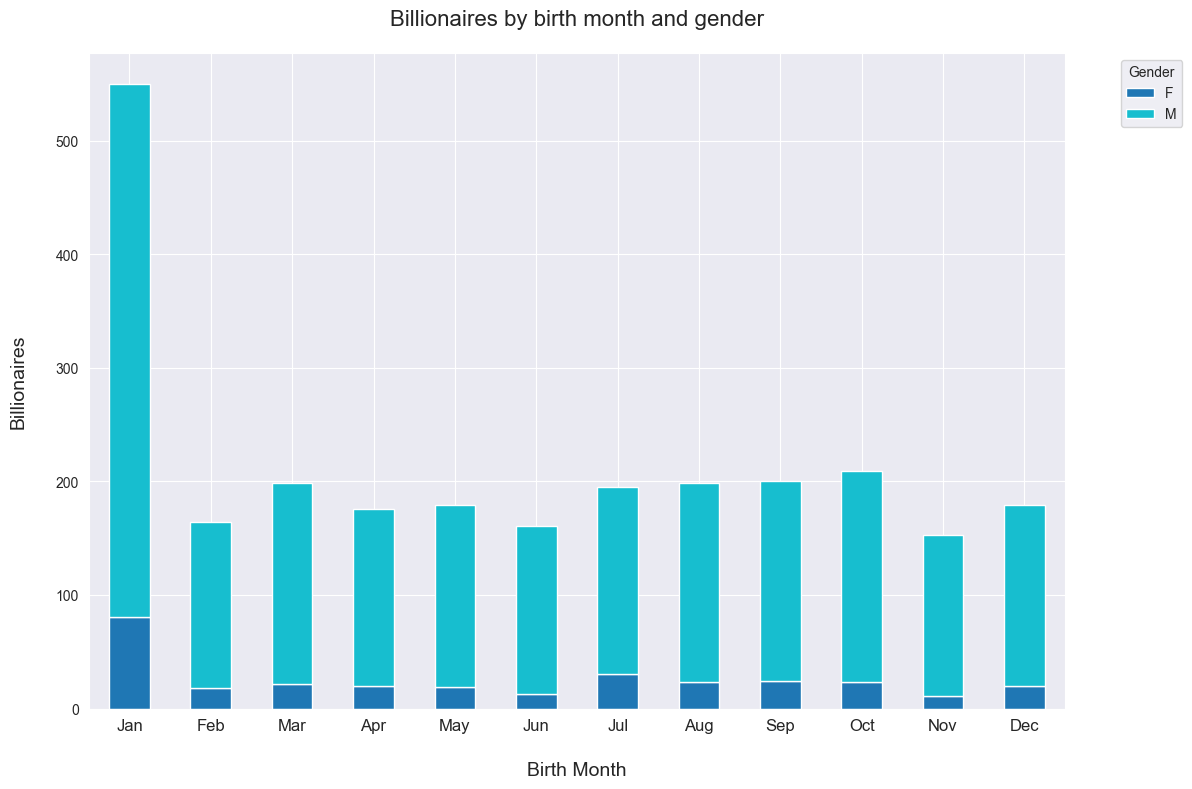

In [147]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bmonth_gender.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Billionaires by birth month and gender', fontsize=16, pad=20)
plt.xlabel('Birth Month', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

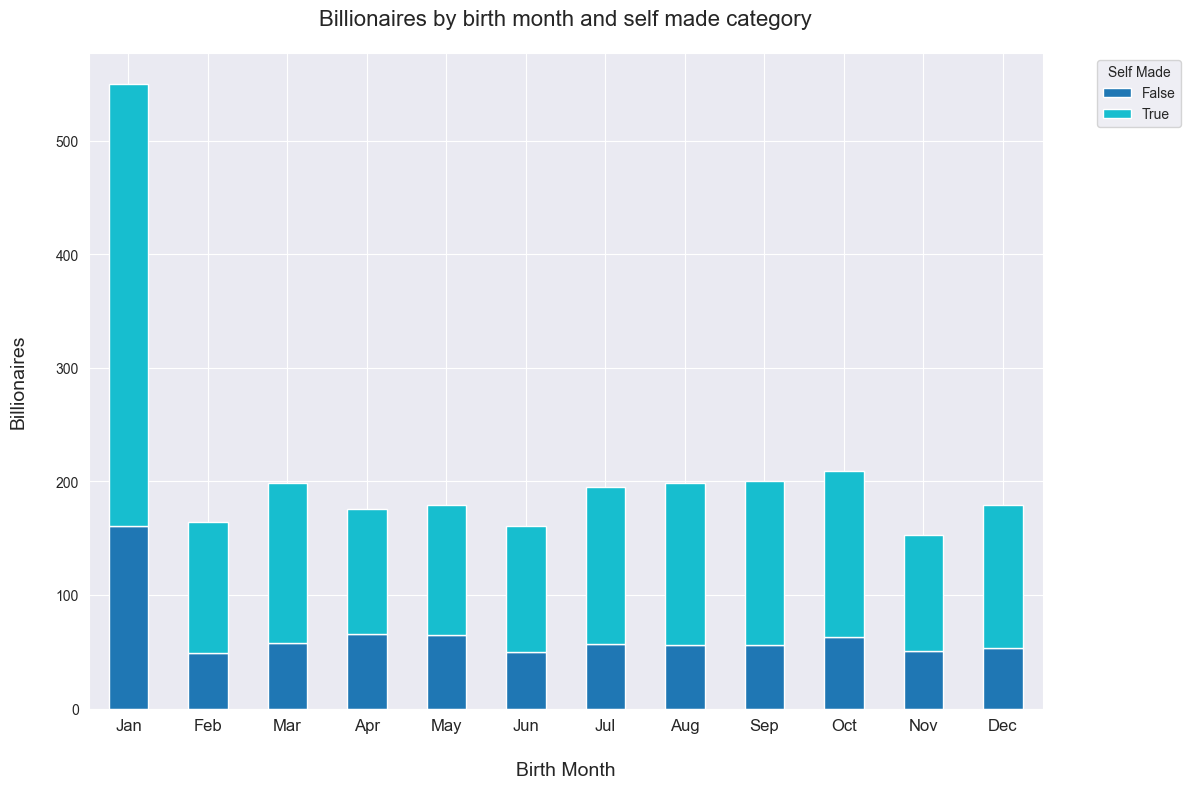

In [149]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bmonth_selfMade.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('Billionaires by birth month and self made category', fontsize=16, pad=20)
plt.xlabel('Birth Month', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [156]:
df_bmonth_gender_usa = df_bill_num_cat_usa.groupby(['birthMonth', 'gender']).size().reset_index(name='count')
df_pivoted_bmonth_gender_usa = df_bmonth_gender_usa.pivot(index='birthMonth', columns='gender', values='count')
# df_pivoted_bdecade_gender = df_pivoted_bdecade_gender.sort_values(by=['M', 'F'], ascending=False)

df_bmonth_selfMade_usa = df_bill_num_cat_usa.groupby(['birthMonth', 'selfMade']).size().reset_index(name='count')
df_pivoted_bmonth_selfMade_usa = df_bmonth_selfMade_usa.pivot(index='birthMonth', columns='selfMade', values='count')
df_pivoted_bmonth_selfMade_usa = df_pivoted_bmonth_selfMade_usa.sort_values(by='birthMonth', ascending=True)

In [157]:
df_pivoted_bmonth_gender_usa

gender,F,M
birthMonth,,
1,19,76
2,7,59
3,6,55
4,8,48
5,7,57
6,3,42
7,11,44
8,11,67
9,5,61


<Figure size 1200x800 with 0 Axes>

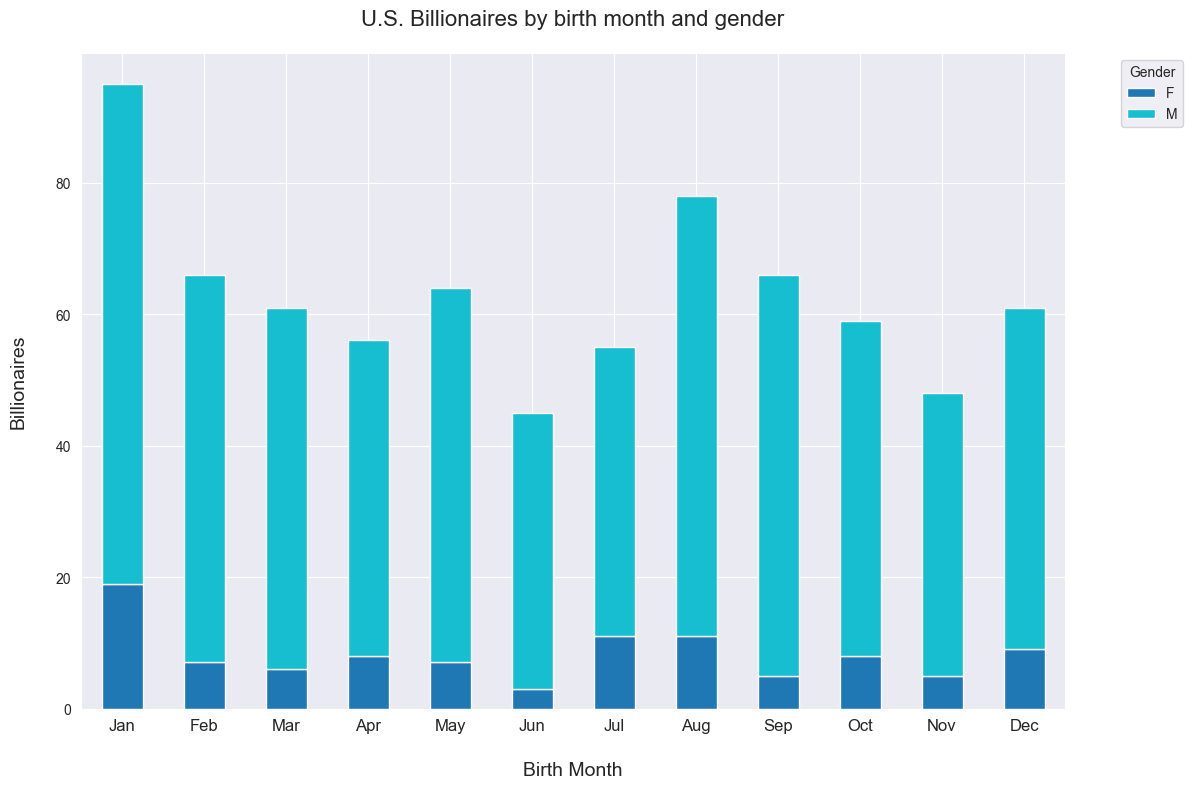

In [159]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bmonth_gender_usa.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('U.S. Billionaires by birth month and gender', fontsize=16, pad=20)
plt.xlabel('Birth Month', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

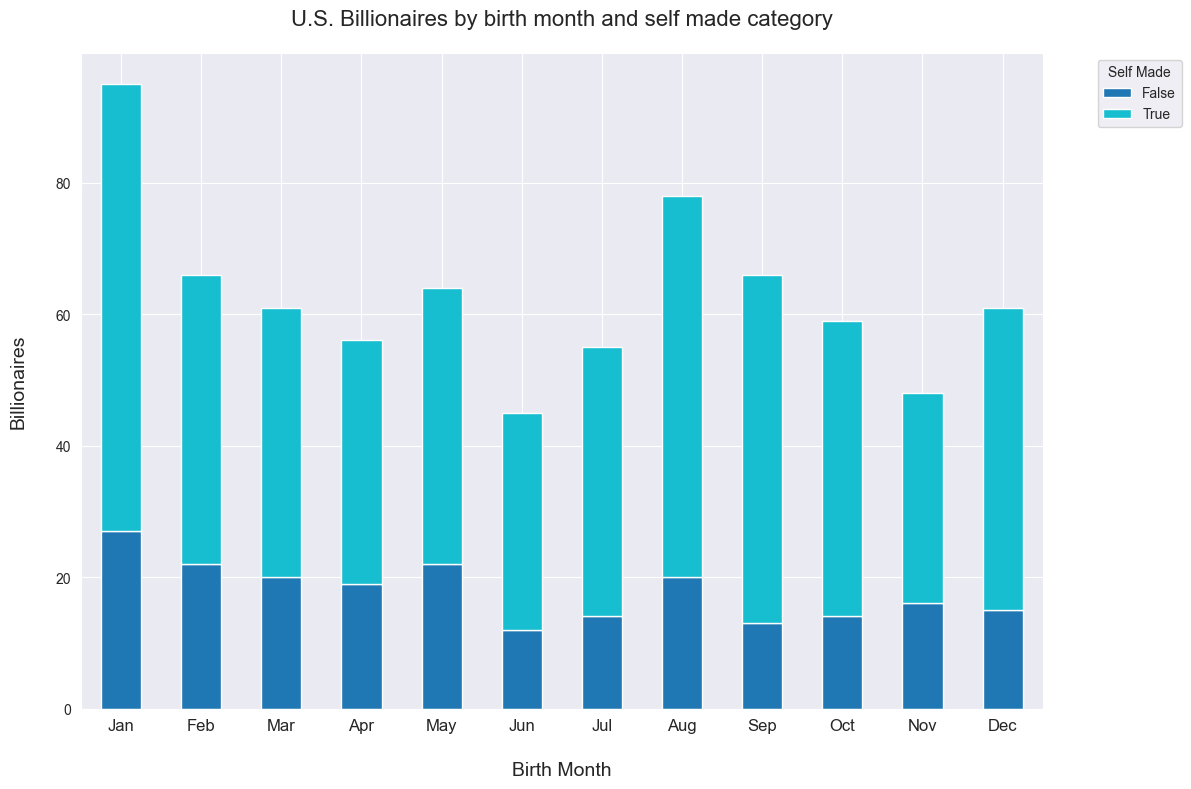

In [161]:
# Create the stacked bar chart
plt.figure(figsize=(12, 8))
df_pivoted_bmonth_selfMade_usa.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')

# Customize the plot
plt.title('U.S. Billionaires by birth month and self made category', fontsize=16, pad=20)
plt.xlabel('Birth Month', fontsize=14, labelpad=20)
plt.ylabel('Billionaires', fontsize=14, labelpad=20)
plt.xticks([i for i in range(0, 12, 1)], [i for i in month_names.values()], rotation=0)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Self Made', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()